# Figure 5

In [1]:
using DifferentialEquations
using ModelingToolkit
using MitochondrialDynamics
using MitochondrialDynamics: GlcConst, degavg, ΔΨm, Ca_c, Ca_m, t, G3P
using MitochondrialDynamics: Pyr, NADH_c, NADH_m, ATP_c, ADP_c, degavg
using MitochondrialDynamics.Utils: second, μM, mV, mM, Hz, minute
import PyPlot as plt
rcParams = plt.PyDict(plt.matplotlib."rcParams")
rcParams["font.size"] = 14
# rcParams["font.sans-serif"] = "Arial"
# rcParams["font.family"] = "sans-serif"

"sans-serif"

In [2]:
tend = 2000.0
@named sys = make_model(; glcrhs=10mM)
sssol = solve(SteadyStateProblem(sys, []), DynamicSS(Rodas5(), tspan=tend))
caavg = sssol[Ca_c]

0.00026801443352651635

In [5]:
function cac_wave(t)
    ca_r = 0.09μM
    period = 2minute
    ka_ca = (caavg - ca_r) * 1.5
    x = 5 * ((t / period) % 1.0)
    return ca_r + ka_ca * (x * exp(1 - x))^4
end

@register_symbolic cac_wave(t)
@named sysosci = make_model(; cacrhs=cac_wave(t), glcrhs=10mM)
prob = ODEProblem(sysosci, sssol.u, tend)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1585-element Vector{Float64}:
    0.0
    0.0006883351420000535
    0.000991466478102344
    0.0012915135922214416
    0.0016167150500477703
    0.00196694502084615
    0.002333824221087403
    0.002704866915318632
    0.0030712495851996247
    0.003430419580367691
    0.0037841326634296224
    0.004135500009354881
    0.004487035921230026
    ⋮
 1980.2575356348007
 1981.5167389945354
 1982.8515417864714
 1984.2752134604982
 1985.8043108566887
 1987.4599894960352
 1989.2699689435008
 1991.2716407913485
 1993.5171917095304
 1996.083347136886
 1999.0867203043304
 2000.0
u: 1585-element Vector{Vector{Float64}}:
 [0.10750877497620974, 0.0031201505968590447, 0.0008438745128640374, 0.12495108100184732, 0.00600474144593352, 0.03519636435409782, 4.356898470231694, 0.004127073545763202, 0.22662999633061456, 0.04019458670139251]
 [0.10750878241710475, 0.003120

In [13]:
function plot_fig5(
    sol; 
    tspan=(1520.0, 2000.0),
    npoints = 200,
    figsize = (10, 12)
)
    ts = LinRange(tspan[1], tspan[2], npoints)
    tsm = ts ./ 60
    ca_c = sol(ts, idxs=Ca_c) .* 1000 
    ca_m = sol(ts, idxs=Ca_m) .* 1000
    g3p = sol(ts, idxs=G3P) .* 1000
    pyr = sol(ts, idxs=Pyr) .* 1000
    nadh_c = sol(ts, idxs=NADH_c) .* 1000
    nadh_m = sol(ts, idxs=NADH_m) .* 1000
    atp_c = sol(ts, idxs=ATP_c) .* 1000
    adp_c = sol(ts, idxs=ADP_c) .* 1000
    td = atp_c.u ./ adp_c
    dpsi = sol(ts, idxs=ΔΨm) .* 1000
    k = sol(ts, idxs=degavg)

    fig, ax = plt.subplots(6, 1; figsize)

    ax[1].plot(tsm, ca_c, label="Ca(cyto)")
    ax[1].plot(tsm, ca_m, label="Ca(mito)")
    ax[1].set_title("A", loc="left")
    for a in ax
        a.grid()
        a.legend()
    end

    plt.tight_layout()
    return fig
end

plot_fig5 (generic function with 1 method)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


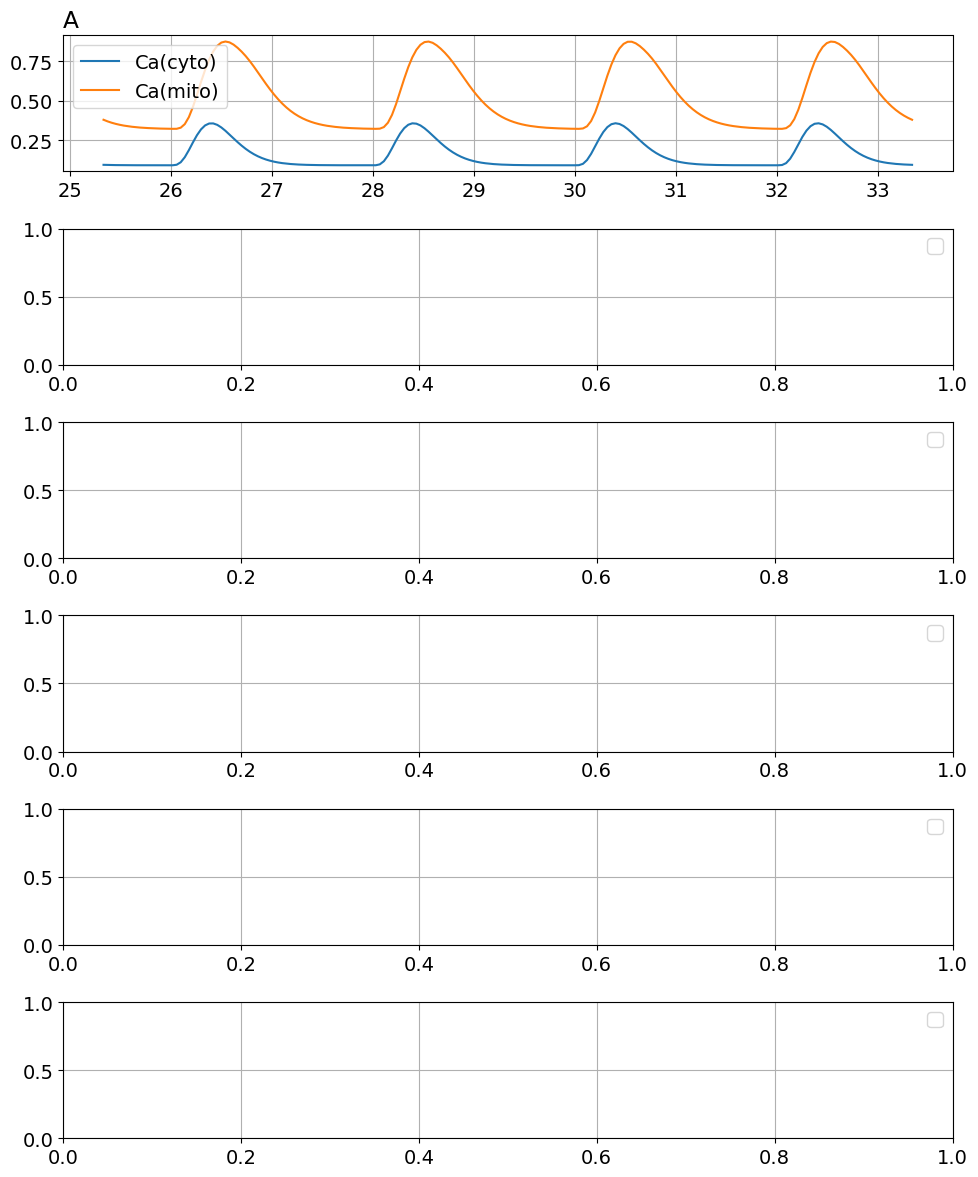

In [14]:
fig5 = plot_fig5(sol);

In [ ]:
pl1 = plot(tsm, ca_c.u .* 1000, title="A", titlelocation=:left, label="Ca(cyto)")
plot!(pl1, tsm, ca_m.u .* 1000, label="Ca(mito)", xlabel="", ylabel="Conc. (μM)",
    legend=:right, xlims=(tsm[begin], tsm[end]), ylims=(0.0, 1.0))

In [ ]:
pl2 = plot(tsm, g3p.u .* 1000, title="B", titlelocation=:left, label="G3P")
plot!(pl2, tsm, nadh_c.u .* 1000, label="NADH (cyto)", xlabel="", ylabel="Conc. (μM)", legend=:right, xlims=(tsm[begin], tsm[end]))

In [ ]:
pl3 = plot(tsm, pyr.u .* 1000, title="C", titlelocation=:left, label="Pyr")
plot!(pl3, tsm, nadh_m.u .* 1000, label="NADH (mito)", xlabel="", ylabel="Conc. (μM)", legend=:right, xlims=(tsm[begin], tsm[end]))

In [ ]:
pl4 = plot(tsm, td, title="D", titlelocation=:left, label="ATP:ADP", xlabel="", legend=:right, xlims=(tsm[begin], tsm[end]))

In [ ]:
pl5 = plot(tsm, dpsi .* 1000, title="E", titlelocation=:left, label="ΔΨm", xlabel="", legend=:right, xlims=(tsm[begin], tsm[end]))

In [ ]:
pl6 = plot(tsm, avgDeg, title="F", titlelocation=:left, label="<k>", xlabel="Time (minute)", legend=:right, xlims=(tsm[begin], tsm[end]))

In [ ]:
plot(pl1, pl2, pl3, pl4, pl5, pl6, layout=(6, 1), size=(1000, 1200))

In [ ]:
# Uncomment to generate the pdf file 
# savefig("Fig5.pdf")